In [54]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [55]:
img = cv2.cvtColor(cv2.imread('pic.tif'), cv2.COLOR_BGR2GRAY)

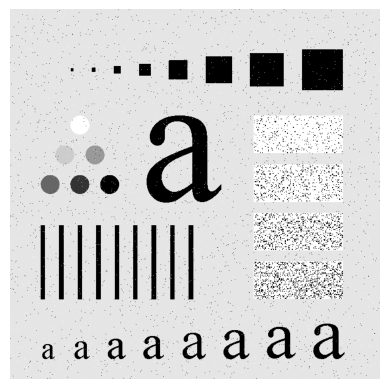

In [56]:
# add salt and paper noise
def addSaltAndPaperNoise(img, noiseAmount):
    noiseImage = img.copy()

    num_salat = int((noiseAmount * img.shape[0] * img.shape[1]) / 2)
    coords_salt = [np.random.randint(0, img.shape[0], num_salat), np.random.randint(0, img.shape[1], num_salat)]
    noiseImage[coords_salt[0], coords_salt[1]] = 255

    num_paper = int((noiseAmount * img.shape[0] * img.shape[1]) / 2)
    coords_paper = [np.random.randint(0, img.shape[0], num_paper), np.random.randint(0, img.shape[1], num_paper)]
    noiseImage[coords_paper[0], coords_paper[1]] = 0
    return noiseImage

noiseImage = addSaltAndPaperNoise(img, noiseAmount=0.01)
                                  
plt.axis('off')
plt.imshow(noiseImage, cmap='gray')

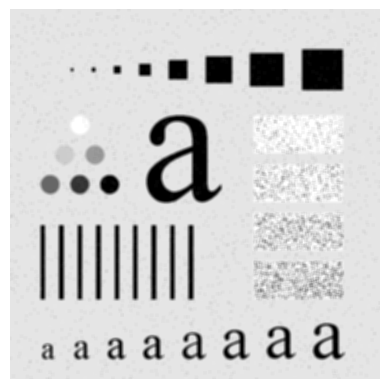

In [ ]:
# average filter with 5x5 mask

def average_filter(img, mask):
    average_filter_image = img.copy()
    pad = mask // 2

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum = 0
            count = 0
            for x in range(-pad, pad + 1):
                for y in range(-pad, pad + 1):
                    x1 = i + x
                    y1 = j + y
                    if 0 <= x1 < img.shape[0] and 0 <= y1 < img.shape[1]:
                        sum += img[x1, y1]
                        count += 1
            average_filter_image[i, j] = int(sum / count)
    
    return average_filter_image


filtered_image = average_filter(noiseImage, 5)                               
plt.axis('off')
plt.imshow(filtered_image, cmap='gray')


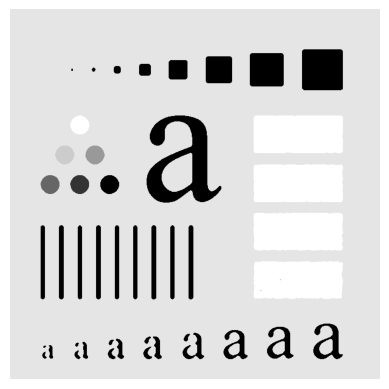

In [63]:
def median_filter(img, mask):
    average_filter_image = img.copy()
    pad = mask // 2

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum = []
            for x in range(-pad, pad + 1):
                for y in range(-pad, pad + 1):
                    x1 = i + x
                    y1 = j + y
                    if 0 <= x1 < img.shape[0] and 0 <= y1 < img.shape[1]:
                        sum.append(img[x1, y1])
            average_filter_image[i, j] = np.median(sum)
    
    return average_filter_image


med_image = median_filter(noiseImage, 5)                               
plt.axis('off')
plt.imshow(med_image, cmap='gray')

In [69]:
def psnr(noiseImage, alteredImage):
    actualImage = np.float64(noiseImage)
    distortedImage = np.float64(alteredImage)


    mse = np.mean((actualImage - distortedImage)**2)
    if mse == 0:
        mse = int('inf')

    psnr = 10 * np.log10((255 * 255) / mse)

    return psnr
print(f'psnr = {psnr(noiseImage, med_image)} dB')


psnr = 17.36052464726064 dB
